In [46]:
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Flatten
from keras.initializers import Constant
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('emails_V2.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1.0
1,Subject: the stock trading gunslinger fanny i...,1.0
2,Subject: unbelievable new homes made easy im ...,1.0
3,Subject: 4 color printing special request add...,1.0
4,"Subject: do not have money , get software cds ...",1.0


In [3]:
df.shape

(5726, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    2043 non-null   object 
 1   spam    2043 non-null   float64
dtypes: float64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df.apply(pd.isnull).sum()

text    3683
spam    3683
dtype: int64

In [6]:
df.dropna(subset = ['text', 'spam'], inplace = True)

In [7]:
df.shape

(2043, 2)

In [8]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.sample(100)

In [11]:
df = df.reset_index(drop = True)

In [12]:
df['text'][0]

'Subject: send the love home with an online photo album  get cd and downloads , all software under $ 99 - $ 15  nobody will believe in you unless you believe in yourself .  nothing feeds upon itself as liberality does .'

In [13]:
df['text'][50]

'Subject: prop 0 sal  dear siobhan _ riskin  our company will place any business with a qualified website permanently at the top of the major search engines guaranteed never to move ( eg : yahoo ! , msn , alta vista , etc ) . if you are interested in being guaranteed first position in the top search engines at a promotional fee , please contact us at hannah @ speedy . com . pe please include the url ( s ) your are interested in promoting this is not pay per click examples will be provided .  sincerely  the search engine placement specialists  if you wish to be removed , please respond to hannah @ speedy . com . pe and type the word : remove in your subject line'

In [14]:
def remove_subject_word(text):
    return text.replace('Subject: ', '')

In [15]:
df['text'] = df['text'].apply(remove_subject_word)

In [16]:
df.head()

,text,spam
0,send the love home with an online photo album ...,1.0
1,200 million targeted leads cd * only $ 99 . 95...,1.0
2,"re : summer work . . jinbaek , this is a pro...",0.0
3,o : \ research \ exotica access our records i...,0.0
4,"pres . to delainy sorry vince , please use th...",0.0


In [17]:
def text_preprocessing(text):
    text = text.lower()
    text = re.sub('[^a-z0-9]', ' ', text)
    text = re.sub('\s+[a-z]\s+', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text.strip()

In [18]:
df['text'] = df['text'].apply(text_preprocessing)

In [19]:
df.head()

,text,spam
0,send the love home with an online photo album ...,1.0
1,200 million targeted leads cd only 99 95 you c...,1.0
2,re summer work jinbaek this is project related...,0.0
3,o research exotica access our records indicate...,0.0
4,pres to delainy sorry vince please use this fi...,0.0


In [20]:
df['text'][0]

'send the love home with an online photo album get cd and downloads all software under 99 15 nobody will believe in you unless you believe in yourself nothing feeds upon itself as liberality does'

In [21]:
df['text'][25]

'your june stats it absolutely true you will get emails like this very soon quickly send me an email and you will get real com miss ion emails with this subject line and big big comm ission pa yments from all the bus inesses you pro mote to pro ve it for limit ed per iod will give you 10 sign ups that will a to o n your bus in ess and will not ask you for sin gle cent penny to get you star ted use these to gen erate an in stant in com only the first 10 replies get 10 paid signups then sitback watch the sign ups join you inst antly in their droves and without you having to do much at all at the end of march you will get comm ission state ments showing that you have ear ned tens of thou ands of doll ars from your existing bus iness oppo rtun it ies miss this and def in it ely missout on the ea sie st and fas test mo ney that you will ever ma ke from your bu sin ess opp or tuni ty email me on earnbigmoney tiscali co uk please put yes in the subject line good luck gavin if have breached yo

In [22]:
tokenizer = Tokenizer()

In [23]:
tokenizer.fit_on_texts(df['text'])

In [24]:
seq = tokenizer.texts_to_sequences(df['text'])

In [25]:
seq2 = []
for i in seq:
    for j in range(len(i)):
        seq2.append(i[: j + 2])

In [26]:
maxlen = max([len(i) for i in seq])
maxlen

2419

In [27]:
pad_seq = pad_sequences(seq2, maxlen = 25, padding = 'pre')

In [28]:
pad_seq

array([[   0,    0,    0, ...,    0,   69,    1],
       [   0,    0,    0, ...,   69,    1,  728],
       [   0,    0,    0, ...,    1,  728,  360],
       ...,
       [ 167,   48, 2391, ...,   29,  815, 1669],
       [  48, 2391,  596, ...,  815, 1669, 5149],
       [  48, 2391,  596, ...,  815, 1669, 5149]], dtype=int32)

In [29]:
X = pad_seq[:,:-1]
y = pad_seq[:,-1]

In [30]:
X

array([[   0,    0,    0, ...,    0,    0,   69],
       [   0,    0,    0, ...,    0,   69,    1],
       [   0,    0,    0, ...,   69,    1,  728],
       ...,
       [ 167,   48, 2391, ...,   25,   29,  815],
       [  48, 2391,  596, ...,   29,  815, 1669],
       [  48, 2391,  596, ...,   29,  815, 1669]], dtype=int32)

In [31]:
y

array([   1,  728,  360, ..., 1669, 5149, 5149], dtype=int32)

In [32]:
df_label = pd.DataFrame()
df_label['label'] = y

In [33]:
df_label.head()

,label
0,1
1,728
2,360
3,13
4,39


In [34]:
classes = df_label['label'].nunique()
classes

5137

In [35]:
glove_file = open('glove.6B.100d.txt', encoding = 'utf-8')
embedding_matrix = dict()
for line in glove_file:
    record = line.split()
    word = record[0]
    vec = np.asarray(record[1: ], dtype = 'float32')
    embedding_matrix[word] = vec
glove_file.close()

In [36]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

5150

In [37]:
embedding_vectors = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    vector = embedding_matrix.get(word)
    if vector is not None:
        embedding_vectors[index] = vector

In [38]:
embedding_vectors

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [-0.70809001,  0.80565   , -0.055914  , ..., -0.34615001,
         0.1214    ,  0.17475   ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [42]:
i = Input(shape = (24, ))
x = Embedding(vocab_size, 100, embeddings_initializer = Constant(embedding_vectors), trainable = False)(i)
x = LSTM(10, return_sequences = True)(x)
x = Flatten()(x)
x = Dense(vocab_size, activation = 'softmax')(x)
model_f = Model(inputs = i, outputs = x)

In [43]:
model_f.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [44]:
early_stopping = EarlyStopping(monitor = 'loss', patience = 7)

In [45]:
history_f = model_f.fit(X, y, epochs = 200, callbacks = [early_stopping])

Epoch 1/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.0336 - loss: 7.5414
Epoch 2/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.0525 - loss: 6.5674
Epoch 3/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.0809 - loss: 5.4905
Epoch 4/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.1845 - loss: 4.4079
Epoch 5/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.3336 - loss: 3.5417
Epoch 6/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.4258 - loss: 2.9708
Epoch 7/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.4818 - loss: 2.6549
Epoch 8/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.5274 - loss: 2.3734
Epoch 9/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.5596 - loss: 2.1830
Epoch 10/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.5871 - loss: 2.0457
Epoch 11/200
790/790 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6081 - loss: 1.9176
Epoch 12/200
790/79

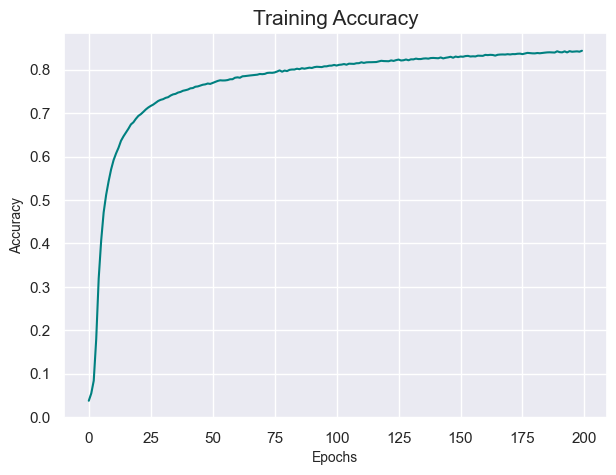

In [47]:
plt.figure(figsize = (7, 5))
plt.plot(history_f.history['accuracy'], color = 'teal')
plt.title('Training Accuracy', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.show()

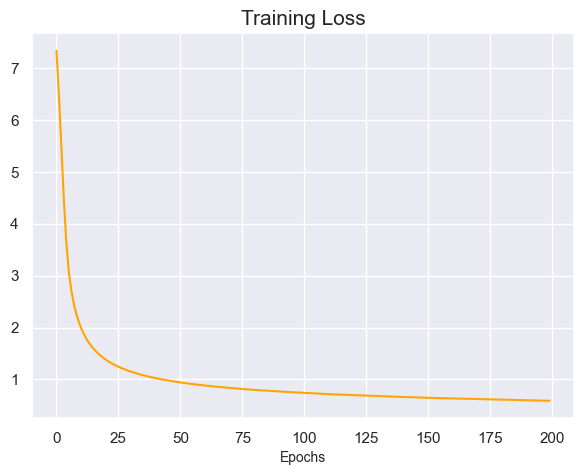

In [50]:
plt.figure(figsize = (7, 5))
plt.plot(history_f.history['loss'], color = 'orange')
plt.title('Training Loss', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.show()

In [51]:
loss_t = max(history_f.history['loss'])
loss_t

7.3416571617126465

In [55]:
loss_f = history_f.history['loss']
loss_fn = np.array(loss_f)
loss_fn = loss_fn / 7.34

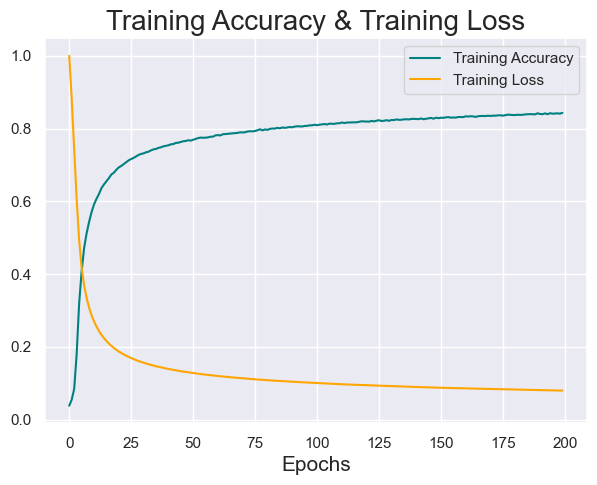

In [56]:
plt.figure(figsize = (7, 5))
plt.plot(history_f.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(loss_fn, label = 'Training Loss', color = 'orange')
plt.title('Training Accuracy & Training Loss', fontsize = 20)
plt.xlabel('Epochs', fontsize = 15)
plt.legend()
plt.show()